# <center> **Visualization**

This task is based on the [Kaggle: Churn for Bank Customers](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers).  

The bank is looking to you for help: they want to develop a customer retention loyalty campaign, but to do so, they need you to figure out the root causes of customer churn. In other words, it is necessary to establish how departed customers differ from loyal ones and how the various features that define customers are interconnected.

After an intelligence analysis to identify the most important churn indicators, the bank will be able to build a machine learning model that will predict customer churn.

**Data description:**  
- RowNumber — corresponds to the record (row) number and has no effect on the output.
- CustomerId — contains random values and has no effect on customer leaving the bank.
- Surname — the surname of a customer has no impact on their decision to leave the bank.
- CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography — a customer’s location can affect their decision to leave the bank.
- Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Ageb— this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts — refers to the number of products that a customer has purchased through the bank.
- HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember — active customers are less likely to leave the bank.
- EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited — whether or not the customer left the bank.

**Purpose of the task:** 
It is necessary to prepare a report in the form of answers to the questions below in the form of a graph and detailed conclusions that you can draw from it.

## **Data preparation and exploration**

In [234]:
# import the necessary libraries
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# import and explore data
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [236]:
# drop a useless feature
data = data.drop('RowNumber', axis=1)

In [237]:
# create new column for loyalty - it will be more comfortable for future work
data['Loyalty'] = data['Exited'].apply(lambda x: 'Quit' if x==1 else 'Loyal')

## **Task 1-10**

**<span style='color:red'>Task 1**  
What is the ratio of lost to loyal customers?

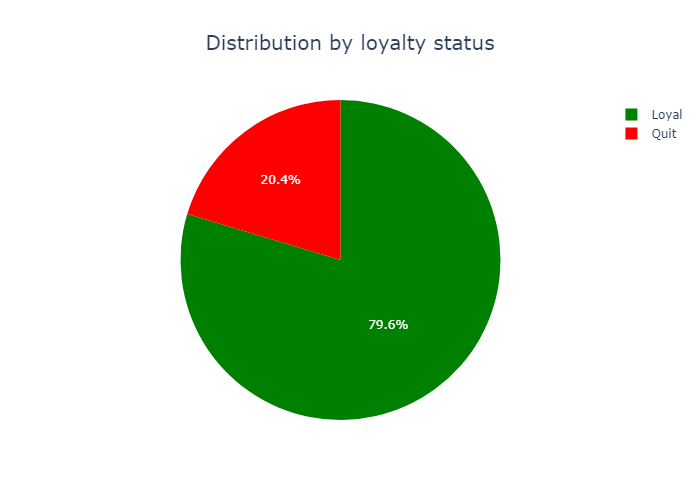

In [238]:
# we will use this color palette for a more transparent visualization
color_map = {'Quit': 'red', 'Loyal': 'green'}

# build a plot
exit_rate_pie = px.pie(
    data_frame=data,
    names='Loyalty',
    title='Distribution by loyalty status',
    color='Loyalty',
    color_discrete_map=color_map
)

# add labels
exit_rate_pie.update_layout(
    title_font_size=20,
    title=dict(x=.5, xanchor='center')
)
# display
exit_rate_pie.show('png')

**Conclusion**   
About 20% of people left this bank, that is, one in five refuses to use.

**<span style='color:red'>Task 2**    
Build a graph showing the balance distribution of users who have more than $2,500 in their account.

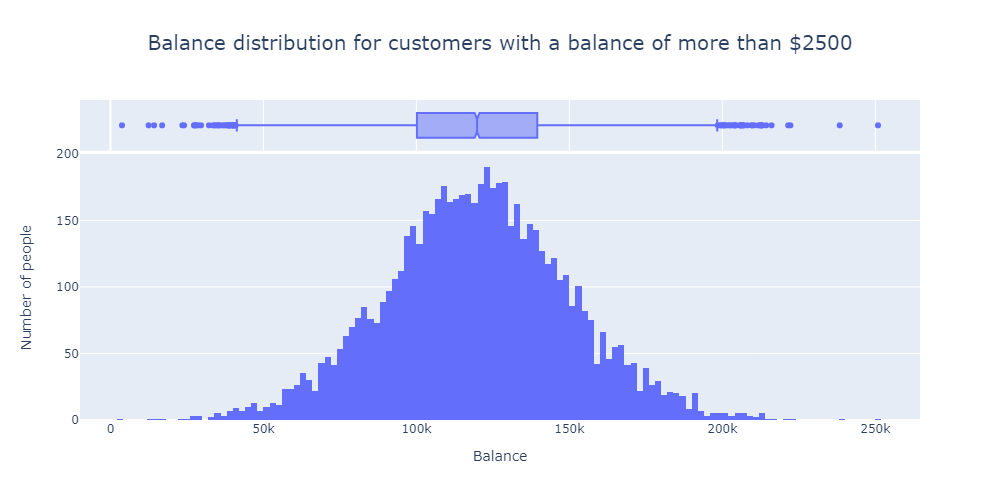

In [239]:
# use a mask
balance_df = data[data['Balance'] > 2500]

# build a graph
balance_distrib = px.histogram(
    data_frame=balance_df,
    x='Balance',
    title='Balance distribution for customers with a balance of more than $2500',
    marginal='box'
)

# add names
balance_distrib.update_layout(
    xaxis_title="Balance",
    yaxis_title='Number of people',
    title_font_size=20,
    width=1000,
    title=dict(x=0.5, xanchor='center')
)

# display
balance_distrib.show('png')

**Conclusion**  
The distribution is normal.  
Judging by the results of the current chart, more than 75% of clients with a balance of $2500 or more have more than $100k in their account. This means that the majority are well-to-do people. With this in mind, it may be worth keeping customers interested in saving more than 100k, for example, by increasing the interest rate or offering new exclusive products, thus increasing their loyalty.  
However, the presented graph does not take into account the number of clients with a balance of less than 2500, which statistically may be more.

**<span style='color:red'>Task 3**    
Look at the distribution of the client's balance in the context of the outflow sign.

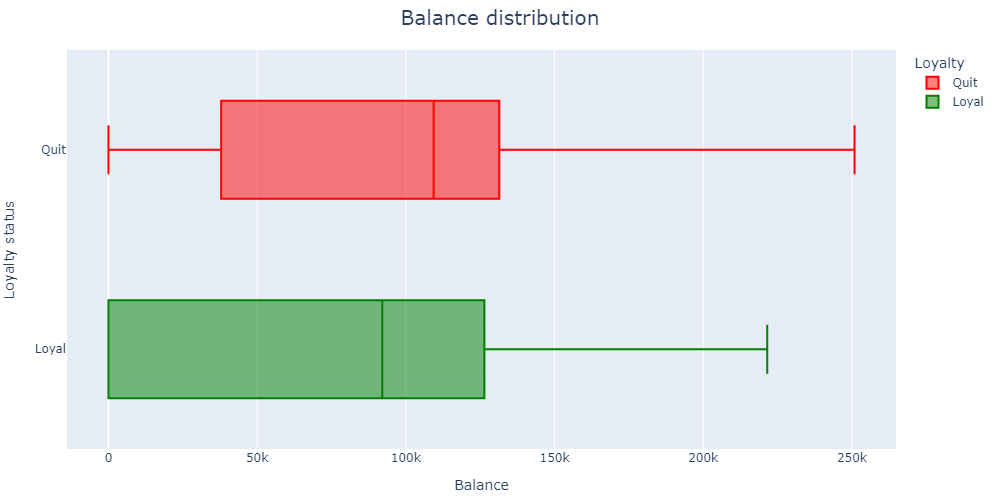

In [240]:
# build a graph
balance_box = px.box(
    data_frame=data,
    x='Balance',
    y='Loyalty',
    color='Loyalty',
    title='Balance distribution',
    color_discrete_map=color_map,
    width=1000
)

# add names
balance_box.update_layout(
    yaxis_title='Loyalty status',
    xaxis_title='Balance',
    title_font_size=20,
    title=dict(x=.5, xanchor='center'),
    margin=dict(l=10, r=10, t=50, b=50)
)

# display the plot
balance_box.show('png')

**Conclusion**  
Comparing the account balance taking into account the sign of loyalty, we clearly see that the distribution of the balance of the departed customers is much smaller, while the account balance is slightly higher in the 50th and 75th quartiles, as well as in the maximum value. Thus, the former clients of the bank are more financially secure people.  
The reason for their departure may be a more profitable financial offer from another bank, the lack of privileges, exclusive offers or other incentives for "rich" clients.  
Looking at the chart, we can assume that among the loyal customers there are a large number of customers with a zero balance. Let's try to appreciate it.

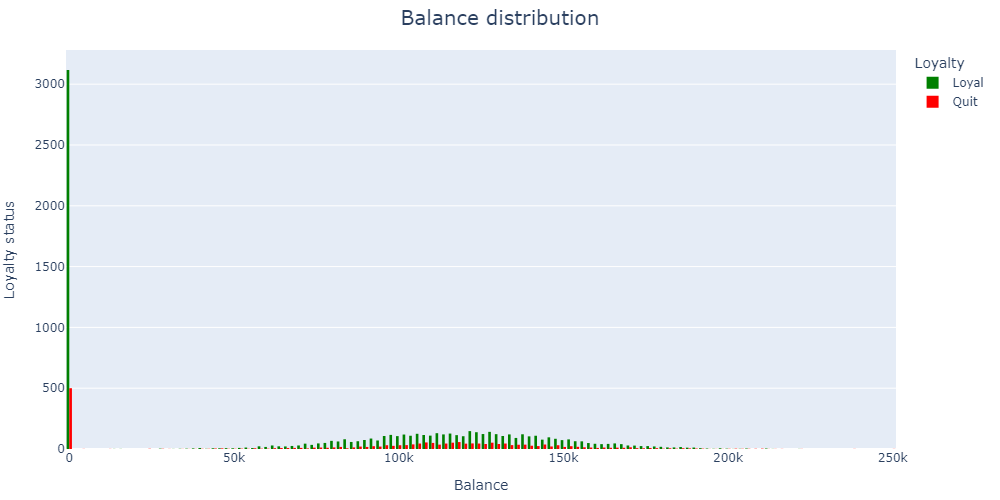

In [241]:
# firstly we should group data
grouped_balance = data.groupby('Balance', as_index=False)['Loyalty'].value_counts()

# build a graph
balance_box = px.histogram(
    data_frame=grouped_balance,
    x='Balance',
    y='count',
    color='Loyalty',
    title='Balance distribution',
    color_discrete_map=color_map,
    width=1000,
    barmode='group'
)

# add names
balance_box.update_layout(
    yaxis_title='Loyalty status',
    xaxis_title='Balance',
    title_font_size=20,
    title=dict(x=.5, xanchor='center'),
    margin=dict(l=10, r=10, t=50, b=50))

# display the plot
balance_box.show('png')

**Conclusion**  
A huge number of customers, which is especially noticeable for a group of loyal customers, have a zero balance. Such clients can quickly move to the group of departed.

**<span style='color:red'>Task 4**    
Estimate the age distribution in terms of the churn attribute.

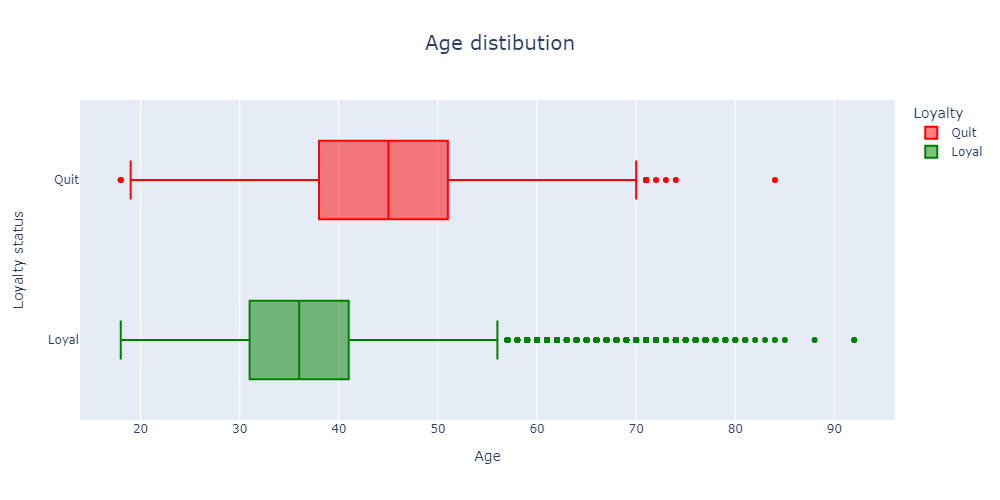

In [242]:
# build a graph
age_distrubution = px.box(
    data_frame= data,
    x='Age',
    y='Loyalty',
    color='Loyalty',
    color_discrete_map=color_map,
    title='Age distibution',
    width=1000
)

# add labels
age_distrubution.update_layout(
    title=dict(x=.5, xanchor='center'),
    yaxis_title='Loyalty status',
    xaxis_title='Age',
    title_font_size=20
)

# display
age_distrubution.show('png')

**Conclusion**  
Loyal customers have a significantly higher number of potential outliers, which are customers over 57 years of age. Judging by the distribution, the age of departed customers is, on average, almost 10 years older than that of loyal customers. A significant part of loyal customers are people aged 31 to 41 years, and those who left - from 38 to 51 years.  
This means that it is necessary to pay attention to clients of middle age and closer to retirement, the vast majority of those who have passed away are in this age group. Their departure may be associated with more favorable conditions from other banks, in particular, with possible pension programs, because most often at this age a person most often thinks about financial well-being in old age.

**<span style='color:red'>Task 5**   
Build a graph that shows the relationship between a client's credit score and their estimated salary.

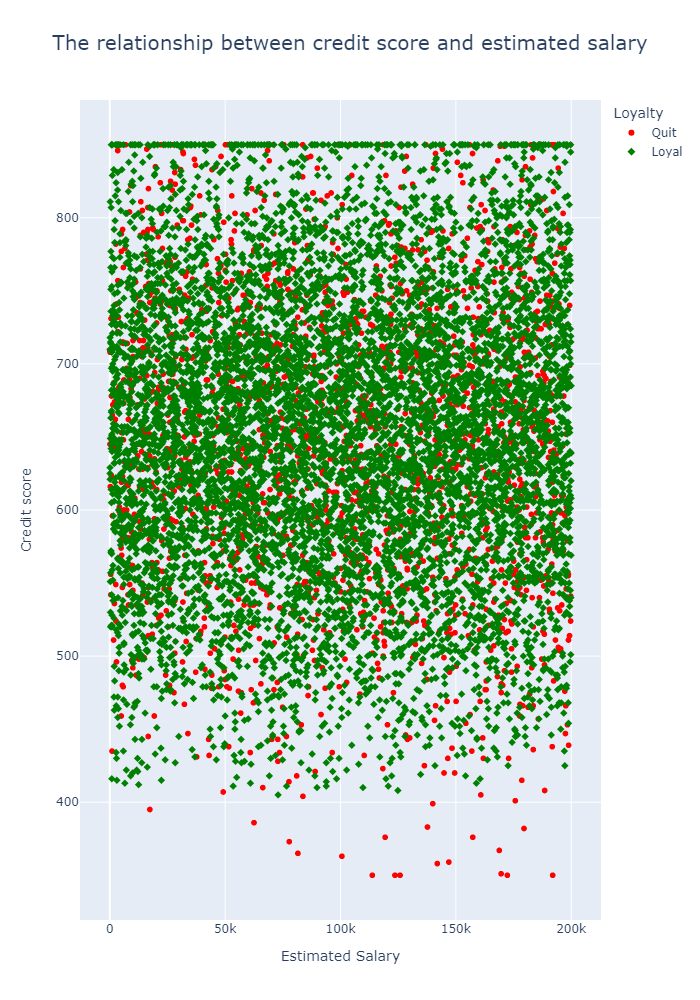

In [243]:
# build a graph
salary_credit_plot = px.scatter(
    data_frame=data,
    x='EstimatedSalary',
    y='CreditScore',
    color='Loyalty',
    symbol='Loyalty',
    color_discrete_map=color_map,
    title='The relationship between credit score and estimated salary',
    height=1000
)

# add labels
salary_credit_plot.update_layout(
    title_font_size=20,
    yaxis_title='Credit score',
    xaxis_title='Estimated Salary',
    title=dict(x=.5, xanchor='center')
)

# display
salary_credit_plot.show('png')

**Conclusion**  
I understand nothing but it's very interesting...  
Let's compare credit score with the mean salary.

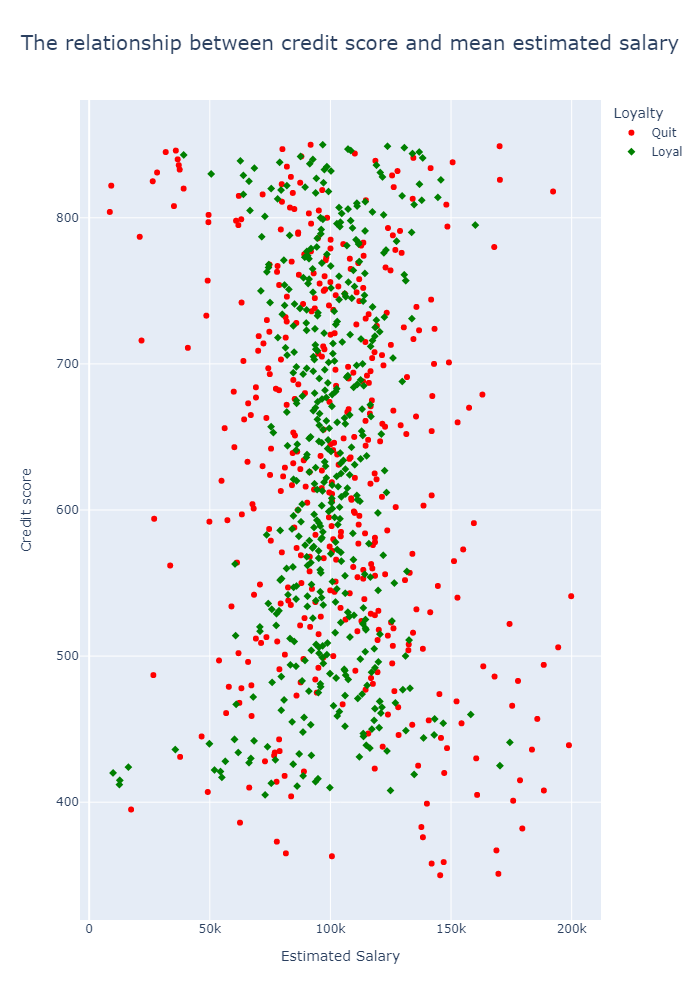

In [244]:
# group data
credit_salary_df = data.groupby(['CreditScore', 'Loyalty'], as_index=False)['EstimatedSalary'].mean()

# build a graph
mean_salary_credit_plot = px.scatter(
    data_frame=credit_salary_df,
    x='EstimatedSalary',
    y='CreditScore',
    color='Loyalty',
    symbol='Loyalty',
    color_discrete_map=color_map,
    title='The relationship between credit score and mean estimated salary',
    height=1000
)

# add labels
mean_salary_credit_plot.update_layout(
    title_font_size=20,
    yaxis_title='Credit score',
    xaxis_title='Estimated Salary',
    title=dict(x=.5, xanchor='center')
)

# display
mean_salary_credit_plot.show('png')

**Conclusion**  
It seems to be clearer.  
A large group of ex-customers with high salaries and low ratings stands out very strongly. And in general, among people with low and high salaries and any credit rating, almost all are former clients.  
It should be assumed that this may be due to an inadequate assessment of the credit rating or a non-competitive loan offer.

**<span style='color:red'>Task 6**   
Who leaves more often, men or women?

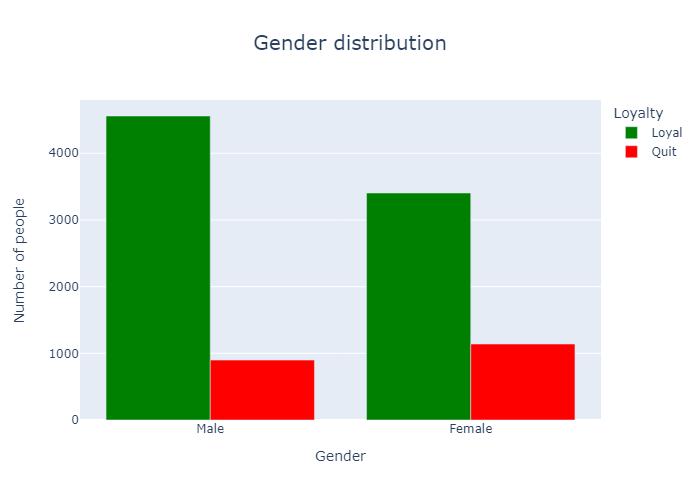

In [245]:
# group data
gender_df = data.groupby(['Loyalty'], as_index=False)['Gender'].value_counts()

# build a graph
gender_distribution = px.bar(
    data_frame=gender_df,
    x='Gender',
    y='count',
    color='Loyalty',
    title='Gender distribution',
    barmode='group',
    color_discrete_map=color_map
)

# add names
gender_distribution.update_layout(
    yaxis_title='Number of people',
    title_font_size=20,
    title=dict(x=.5, xanchor='center')
)

# display
gender_distribution.show('png')

**Conclusion**  
The number of women is clearly less than that of men. However, there are more former clients among women. Obviously, the probability of their leaving is higher, let's try to find out this probability.

In [246]:
data.groupby('Gender', as_index=False)['Exited'].mean()

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


**Conclusion**  
Every fourth woman and only every 6th man stops using bank services. Perhaps this is due to some restrictions of the bank or its specifics.

**<span style='color:red'>Task 7**   
How does the outflow of customers depend on the number of services purchased from the bank?

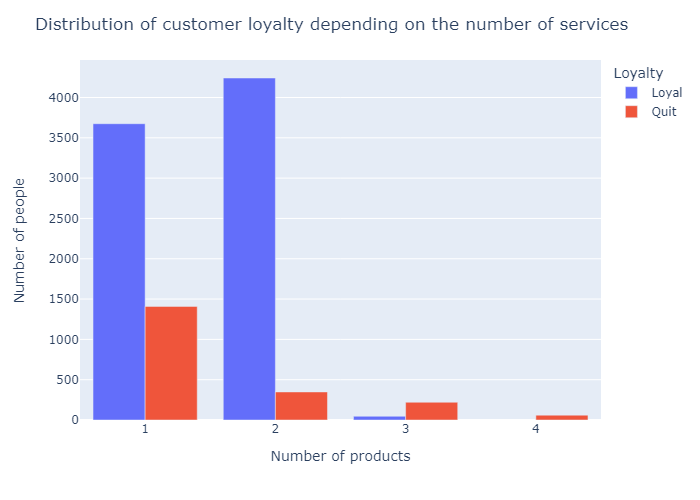

In [247]:
# group data
purchase_services = data.groupby('NumOfProducts', as_index=False)['Loyalty'].value_counts()

# build a graph
purchase_services_plot = px.bar(
    data_frame=purchase_services,
    x='NumOfProducts',
    y='count',
    color='Loyalty',
    barmode='group'
)

# add labels
purchase_services_plot.update_layout(
    title='Distribution of customer loyalty depending on the number of services',
    xaxis_title='Number of products',
    yaxis_title='Number of people'
)

# display
purchase_services_plot.show('png')

**Conclusion**  
The number of services for loyal customers is sharply higher, the modal value for them is 2, and for those who left - 1. However, the number of people who used 3 services and 4 for the departed ones is slightly higher.
This means that most of those who refused the bank were less interested in its services. Accordingly, the task of the bank is to try to interest loyal customers with new offers.

**<span style='color:red'>Task 8**  
How does being an active customer affect customer churn?

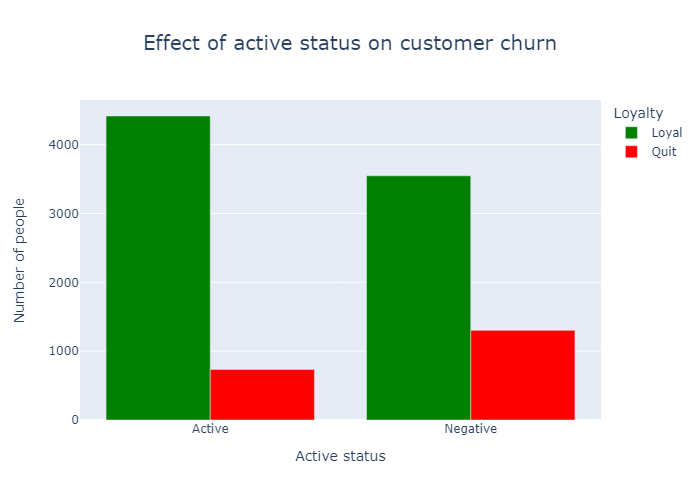

In [248]:
# rename an activity status
data['IsActiveMember'] = data['IsActiveMember'].apply(lambda x: 'Active' if x==1 else 'Negative')

# group data
active_member_df = data.groupby(by=['IsActiveMember'],as_index=False)['Loyalty'].value_counts()

# build a graph
active_member_plot = px.bar(
    data_frame=active_member_df,
    x='IsActiveMember',
    y='count',
    color='Loyalty',
    barmode = 'group',
    color_discrete_map=color_map,
    title='Effect of active status on customer churn',
)

# add labels
active_member_plot.update_layout(
    xaxis_title='Active status',
    yaxis_title='Number of people',
    title_font_size=20,
    title=dict(x=.5, xanchor='center')
)

# display
active_member_plot.show('png')

**Conclusion**  
Among the departed clients, almost 2/3 were passive; stopped using the services of the bank, and then completely left. At the same time, a similar trend is emerging among loyal customers. The number of passive loyal customers is not much lower than active ones. Thus, the probability of their transition to the status of the departed is quite high. The Bank should focus on retaining this particular category of customers as much as possible.

**<span style='color:red'>Task 9**  
Which country has the highest churn rate? Build a thermal cartogram that will show this relationship on a world map.

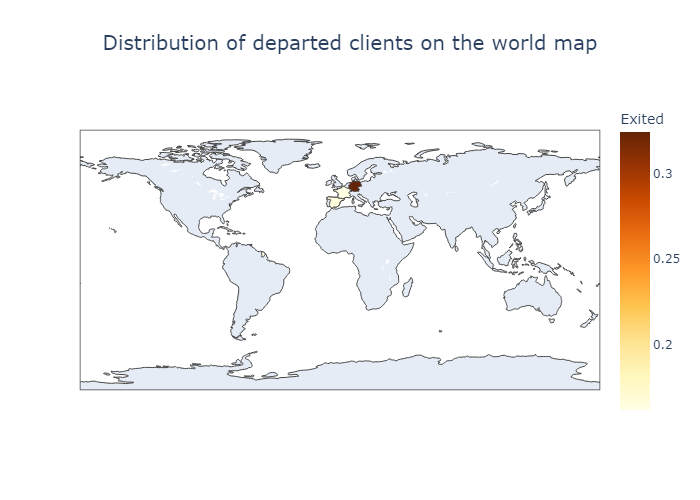

In [249]:
# group data
geography_df = data.groupby('Geography', as_index=False)['Exited'].mean()

# build a graph
geography_plot = px.choropleth(
    data_frame=geography_df,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    color_continuous_scale='ylorbr',
    title='Distribution of departed clients on the world map'
)

# add labels
geography_plot.update_layout(
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
geography_plot.show('png')

**Concluion**  
In Germany, the probability of a client leaving is almost 33%, that is, almost every third person has ceased to be a bank client.

**<span style='color:red'>Task 10**  
Convert the CreditScore numeric attribute to a categorical one.  
Build a pivot table whose rows are credit score categories (CreditScoreCat) and whose columns are the number of years a customer has been using the bank (Tenure). The cells of the pivot table should contain the average on the basis of the outflow (Exited) - the proportion of users who left.

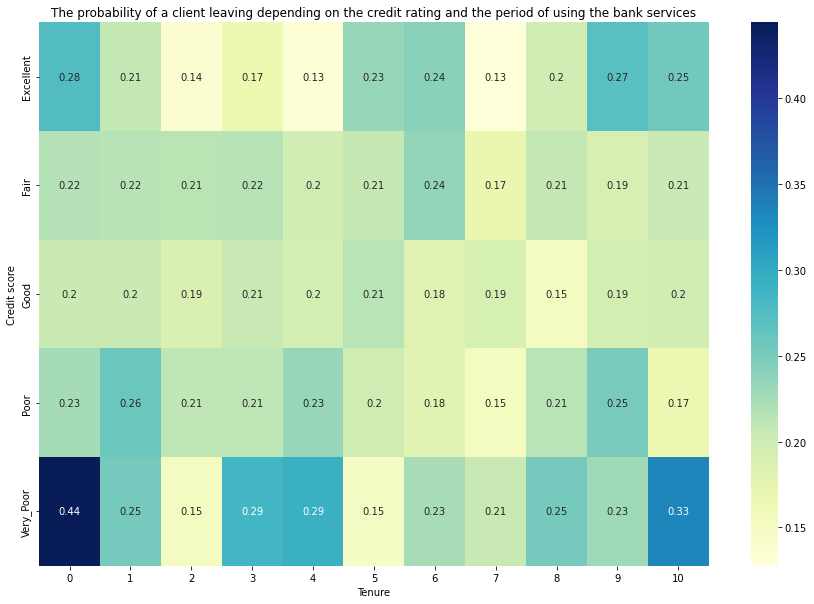

In [250]:
def get_credit_score_cat(credit_score):
    """transfer of a credit rating from a numerical form to a categorical one"""
    
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    
    elif credit_score >= 851:
        return "Top"
    
    elif credit_score < 300:
        return "Deep"
    

# create new feature - categorical credit score  
data['CreditScoreCat'] = data['CreditScore'].apply(get_credit_score_cat)

# build a pivot table
credit_categic_df = data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

# build a graph
fig = plt.figure(figsize=(15, 10))
churn_probab = sns.heatmap(
    data=credit_categic_df,
    annot=True,
    cmap='YlGnBu'
)

# add labels
churn_probab.set(
    title='The probability of a client leaving depending on the credit rating and the period of using the bank services',
    xlabel='Tenure',
    ylabel='Credit score'
);

**Conclusion**  
The highest probability of leaving in 2 categories:
- for customers with a low credit rating, especially those with a duration of using the bank's services for 1 year and 10 years.
- new customers with a high credit rating and customers with a high rating and a long period of use.


## **General conclusion**  
Based on the presented data, the following conclusions can be drawn:  
1. The bank should choose its target group. A large number of middle-aged clients, high incomes and high balance sheets, that is, above the middle class, is one of the most popular categories for refusing bank services. If this is the core group, additional incentives are needed to avoid losing customers
2. It is necessary to analyze the credit rating system. A large number of clients from the group who left had a long period of use of bank services, a high balance or salary.
3. Almost every fourth woman refuses bank services. Additional attention to this group is required.
4. It is important to find out the cause of the problem in the German office of the bank. Almost one in three ceased to be a member of the bank.